In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import os
import seaborn as sn
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.9.1
Num GPUs Available:  1


In [30]:
LR = 5e-4
batch_size = 2
epochs = 70
patience = 10
dropout = 0.3
model_name = f'model4_6_lr{LR:.0e}_b{batch_size}_do{dropout}'

input_shape = (240, 240, 3)
num_classes = 6
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(64, activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(num_classes, activation='softmax'),
    ]
)
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(LR),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 240, 240, 32)      896       
                                                                 
 batch_normalization_15 (Bat  (None, 240, 240, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 120, 120, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 120, 120, 32)      9248      
                                                                 
 batch_normalization_16 (Bat  (None, 120, 120, 32)     128       
 chNormalization)                                                
                                                      

In [31]:
train_generator = ImageDataGenerator(
        rotation_range=90,
        height_shift_range=0.2,
        width_shift_range=0.2,
        shear_range=3,
        brightness_range=(0.5, 1),
        zoom_range=[0.8, 1],
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='reflect',
        rescale=1./255,
)

valid_generator = ImageDataGenerator(
        rotation_range=40,
        brightness_range=(0.5, 1),
        zoom_range=[0.8, 1],
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='reflect',
        rescale=1./255,
)

train_flow = train_generator.flow_from_directory(
        batch_size=batch_size,
        directory=f'datasets/train',
        shuffle=True,
        target_size=(240, 240),
    )

valid_flow = valid_generator.flow_from_directory(
        batch_size=batch_size,
        directory=f'datasets/valid',
        shuffle=True,
        target_size=(240, 240),
    )

test_flow = valid_generator.flow_from_directory(
        batch_size=batch_size,
        directory=f'datasets/test',
        shuffle=False,
        target_size=(240, 240),
    )

Found 451 images belonging to 6 classes.
Found 57 images belonging to 6 classes.
Found 56 images belonging to 6 classes.


In [32]:
STEP_SIZE_TRAIN=train_flow.n//train_flow.batch_size
STEP_SIZE_VALID=valid_flow.n//valid_flow.batch_size

checkpoint = tf.keras.callbacks.ModelCheckpoint(f'trained_models/{model_name}', save_best_only=True)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
history = model.fit(train_flow,
            steps_per_epoch=STEP_SIZE_TRAIN,
            validation_data=valid_flow,
            validation_steps=STEP_SIZE_VALID,
            epochs=epochs,
            callbacks=[stop_early, checkpoint],
)

Epoch 1/70
224/225 [============================>.] - ETA: 0s - loss: 2.1082 - accuracy: 0.2864

INFO:tensorflow:Assets written to: trained_models\model4_6_lr5e-04_b2_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\model4_6_lr5e-04_b2_do0.3\assets


225/225 [==============================] - 14s 54ms/step - loss: 2.1037 - accuracy: 0.2873 - val_loss: 2.6629 - val_accuracy: 0.3036
Epoch 2/70
224/225 [============================>.] - ETA: 0s - loss: 1.6924 - accuracy: 0.3289

INFO:tensorflow:Assets written to: trained_models\model4_6_lr5e-04_b2_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\model4_6_lr5e-04_b2_do0.3\assets


225/225 [==============================] - 11s 51ms/step - loss: 1.6893 - accuracy: 0.3296 - val_loss: 1.6756 - val_accuracy: 0.3393
Epoch 3/70
224/225 [============================>.] - ETA: 0s - loss: 1.5251 - accuracy: 0.3647

INFO:tensorflow:Assets written to: trained_models\model4_6_lr5e-04_b2_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\model4_6_lr5e-04_b2_do0.3\assets


225/225 [==============================] - 12s 51ms/step - loss: 1.5240 - accuracy: 0.3630 - val_loss: 1.1661 - val_accuracy: 0.4643
Epoch 4/70
224/225 [============================>.] - ETA: 0s - loss: 1.4427 - accuracy: 0.4362

INFO:tensorflow:Assets written to: trained_models\model4_6_lr5e-04_b2_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\model4_6_lr5e-04_b2_do0.3\assets


225/225 [==============================] - 11s 50ms/step - loss: 1.4429 - accuracy: 0.4365 - val_loss: 1.0900 - val_accuracy: 0.5357
Epoch 5/70
225/225 [==============================] - 8s 37ms/step - loss: 1.3225 - accuracy: 0.4321 - val_loss: 1.9972 - val_accuracy: 0.3750
Epoch 6/70
224/225 [============================>.] - ETA: 0s - loss: 1.1752 - accuracy: 0.4989

INFO:tensorflow:Assets written to: trained_models\model4_6_lr5e-04_b2_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\model4_6_lr5e-04_b2_do0.3\assets


225/225 [==============================] - 11s 51ms/step - loss: 1.1740 - accuracy: 0.4989 - val_loss: 0.9313 - val_accuracy: 0.5536
Epoch 7/70
225/225 [==============================] - 8s 37ms/step - loss: 1.2886 - accuracy: 0.4633 - val_loss: 2.6476 - val_accuracy: 0.5357
Epoch 8/70
225/225 [==============================] - 8s 36ms/step - loss: 1.1688 - accuracy: 0.5234 - val_loss: 7.3551 - val_accuracy: 0.3571
Epoch 9/70
225/225 [==============================] - 8s 37ms/step - loss: 1.1526 - accuracy: 0.5278 - val_loss: 0.9439 - val_accuracy: 0.5893
Epoch 10/70
225/225 [==============================] - 8s 37ms/step - loss: 0.9948 - accuracy: 0.6058 - val_loss: 5.9714 - val_accuracy: 0.3571
Epoch 11/70
225/225 [==============================] - 8s 37ms/step - loss: 1.1878 - accuracy: 0.5367 - val_loss: 1.4342 - val_accuracy: 0.5000
Epoch 12/70
225/225 [==============================] - ETA: 0s - loss: 0.8895 - accuracy: 0.6481

INFO:tensorflow:Assets written to: trained_models\model4_6_lr5e-04_b2_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\model4_6_lr5e-04_b2_do0.3\assets


225/225 [==============================] - 11s 49ms/step - loss: 0.8895 - accuracy: 0.6481 - val_loss: 0.8026 - val_accuracy: 0.7143
Epoch 13/70
225/225 [==============================] - 8s 37ms/step - loss: 0.9039 - accuracy: 0.6548 - val_loss: 3.5699 - val_accuracy: 0.5000
Epoch 14/70
225/225 [==============================] - 8s 37ms/step - loss: 0.8770 - accuracy: 0.6481 - val_loss: 2.4848 - val_accuracy: 0.5536
Epoch 15/70
225/225 [==============================] - 8s 36ms/step - loss: 0.7908 - accuracy: 0.6971 - val_loss: 2.3014 - val_accuracy: 0.5893
Epoch 16/70
225/225 [==============================] - 8s 37ms/step - loss: 0.7585 - accuracy: 0.6771 - val_loss: 2.2646 - val_accuracy: 0.3571
Epoch 17/70
225/225 [==============================] - 8s 36ms/step - loss: 0.7395 - accuracy: 0.7394 - val_loss: 1.1160 - val_accuracy: 0.6429
Epoch 18/70
224/225 [============================>.] - ETA: 0s - loss: 0.8891 - accuracy: 0.6644

INFO:tensorflow:Assets written to: trained_models\model4_6_lr5e-04_b2_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\model4_6_lr5e-04_b2_do0.3\assets


225/225 [==============================] - 12s 51ms/step - loss: 0.8899 - accuracy: 0.6615 - val_loss: 0.7617 - val_accuracy: 0.7321
Epoch 19/70
225/225 [==============================] - 8s 37ms/step - loss: 0.6929 - accuracy: 0.7350 - val_loss: 2.0355 - val_accuracy: 0.4286
Epoch 20/70
224/225 [============================>.] - ETA: 0s - loss: 0.5600 - accuracy: 0.7740

INFO:tensorflow:Assets written to: trained_models\model4_6_lr5e-04_b2_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\model4_6_lr5e-04_b2_do0.3\assets


225/225 [==============================] - 11s 50ms/step - loss: 0.5593 - accuracy: 0.7728 - val_loss: 0.5307 - val_accuracy: 0.7500
Epoch 21/70
225/225 [==============================] - 8s 37ms/step - loss: 0.5969 - accuracy: 0.7706 - val_loss: 2.4671 - val_accuracy: 0.5000
Epoch 22/70
224/225 [============================>.] - ETA: 0s - loss: 0.5780 - accuracy: 0.7785

INFO:tensorflow:Assets written to: trained_models\model4_6_lr5e-04_b2_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\model4_6_lr5e-04_b2_do0.3\assets


225/225 [==============================] - 11s 51ms/step - loss: 0.5762 - accuracy: 0.7795 - val_loss: 0.2604 - val_accuracy: 0.9286
Epoch 23/70
225/225 [==============================] - 9s 38ms/step - loss: 0.5349 - accuracy: 0.8174 - val_loss: 4.1809 - val_accuracy: 0.4464
Epoch 24/70
225/225 [==============================] - 8s 37ms/step - loss: 0.5779 - accuracy: 0.7862 - val_loss: 2.1699 - val_accuracy: 0.6429
Epoch 25/70
225/225 [==============================] - 8s 37ms/step - loss: 0.5711 - accuracy: 0.7773 - val_loss: 0.3542 - val_accuracy: 0.8393
Epoch 26/70
225/225 [==============================] - 8s 37ms/step - loss: 0.4853 - accuracy: 0.8196 - val_loss: 0.7249 - val_accuracy: 0.6786
Epoch 27/70
225/225 [==============================] - 8s 37ms/step - loss: 0.6006 - accuracy: 0.8040 - val_loss: 0.8417 - val_accuracy: 0.7321
Epoch 28/70
225/225 [==============================] - 8s 36ms/step - loss: 0.5792 - accuracy: 0.8018 - val_loss: 1.3997 - val_accuracy: 0.5893
Epo

In [33]:
# Save training history
hist_df = pd.DataFrame(history.history) 
hist_csv_file = f'trained_models/{model_name}/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [34]:
model = tf.keras.models.load_model('trained_models/' + model_name) #model_name

test_flow.reset()

scores = model.evaluate(test_flow)

print("%s%s: %.2f%%" % ("evaluate ", model.metrics_names[1], scores[1]*100))

28/28 [==============================] - 1s 33ms/step - loss: 0.2744 - accuracy: 0.8393
evaluate accuracy: 83.93%


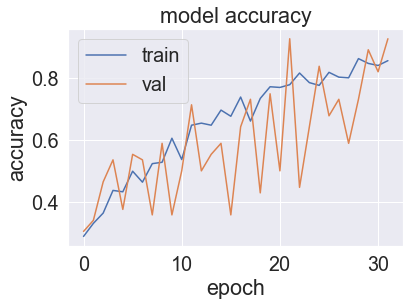

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

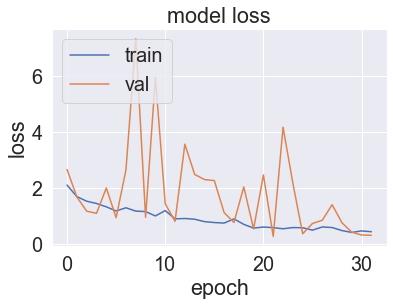

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [37]:
CLASSES = []
for subdir in os.listdir('raw_datasets'):
    CLASSES.append(subdir)
    
print(CLASSES)
    
index = 2
img_num = 34

TEST_IMAGES = []
TEST_LABELS = []
for subdir in os.listdir('datasets/test'):
    for file in os.listdir(os.path.join('datasets', 'test', subdir)):
        TEST_IMAGES.append(np.asarray(Image.open(f'datasets/test/{subdir}/{file}')).astype(np.float32)/255.)
        TEST_LABELS.append(CLASSES.index(subdir))
        
TEST_IMAGES = np.asarray(TEST_IMAGES)
TEST_LABELS = np.asarray(TEST_LABELS)
        
img = np.asarray(Image.open(f'raw_datasets/{CLASSES[index]}/{img_num}.jpg')).astype(np.float32)/255.
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print(CLASSES[np.argmax(pred)])

['gray painted wood', 'gray rug', 'gray wood', 'light brown wood', 'rubber stairs', 'stone tile']
1/1 [==============================] - 0s 151ms/step
gray rug


{'gray painted wood': 0, 'gray rug': 1, 'gray wood': 2, 'light brown wood': 3, 'rubber stairs': 4, 'stone tile': 5}
2/2 [==============================] - 0s 79ms/step


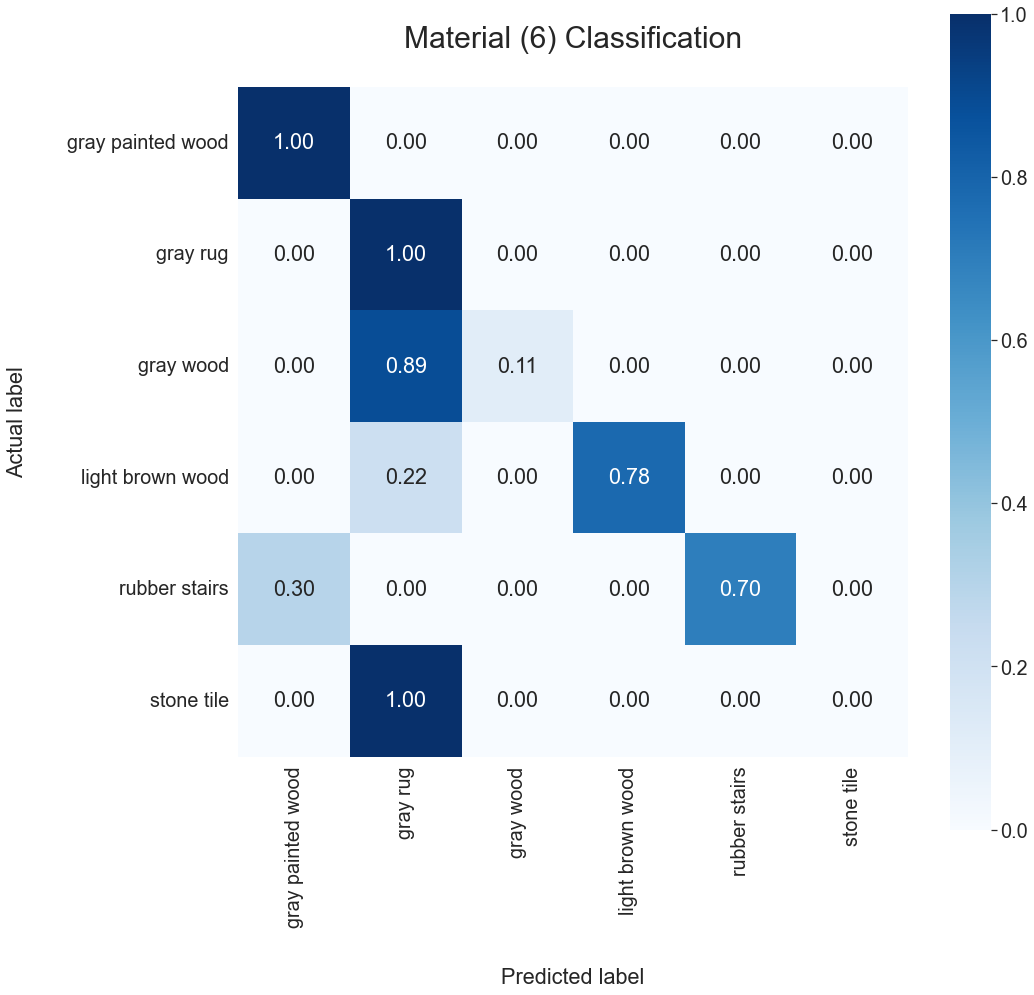

In [38]:
file_name = f'./confusion_matrix/{model_name}/confusion_matrix_{num_classes}class_{model_name}'
title = f'Material (6) Classification'

if not os.path.exists('./confusion_matrix'):
    os.mkdir('./confusion_matrix')

if not os.path.exists(f'./confusion_matrix/{model_name}'):
    os.mkdir(f'./confusion_matrix/{model_name}')

test_labels = test_flow.class_indices
print(test_labels)
predictions = tf.math.argmax(model.predict(TEST_IMAGES), axis=1)
cf = tf.math.confusion_matrix(TEST_LABELS, predictions).numpy()
cf = cf / cf.sum(axis=1)[:, np.newaxis]
df = pd.DataFrame(cf, index=CLASSES, columns=CLASSES)
plt.figure(figsize=(15, 15))
sn.set(font_scale=1.8)
hm = sn.heatmap(df, annot=True, cmap='Blues', square=True, fmt='.2f')
plt.xlabel('Predicted label', labelpad=40)
plt.ylabel('Actual label', labelpad=40)
plt.title(title, y=1.03, pad=20, fontsize=30)
plt.savefig(file_name + '_transparent.png', transparent=True)
plt.savefig(file_name + '_white.png', transparent=False, facecolor='white')